<p Style='text-align: right; font-size: 130%'> 30/06/2023 </p>

<center><img src='imagen.webp'></center>

<h2 Style='color:#2c2b4b; text-align: center'> Empresa PK2 </h2>

<h2 Style='color:#2c2b4b; text-align: center; font-size: 90%'> IIC-2023 </h2>

<p Style='font-family:Arial'> Durante los años 2021 y 2022 la empresa PK2, ha estado analizando incursionar en la venta de Bienes Rices en los Estados Unidos, siendo que previo a tomar una decisión respecto a dar inicio con las operaciones de venta de propiedades se procedió a recopilar información relacionada con el sector de bienes raíces de USA. <br>

Como resultado de la recopilación de los datos, PK2 identificó y consolido un set de datos con 200.000 observaciones, cada una de ellas conformadas por 14 variables, es decir se generó un Data Set de 2.800.000 datos, razón por la cual se decidido contratar sus servicios para generar el proceso de análisis en pro de disponer de insumos para el proceso de toma de decisiones. <br>

Adicionalmente, en función de los datos podría determinarse alguna estrategia de ventas de propiedades en alguna ciudad, adicionalmente siéntase en la libertad de incluir algunos otros datos que por contexto de negocio le parezcan relevantes para la toma de decisiones. <br>

Es importante mencionar que producto de la labor de analítica su persona deberá entregar un informe ejecutivo donde se plasmen sus hallazgos y conclusiones, este no deberá superar 10 páginas.</p>

<table>
  <tr>
    <td> <img src="Info.avif" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://www.kaggle.com/datasets/utkarshx27/real-estate-sales-2001-2020-gl">Fuente de datos para la realizacion del proyecto</a></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Este es un repositorio abierto para el uso de DataSet con proposito academico, siendo que en este podemos encontrar la meta data necesaria para generar el trabajo durante el cuatrimestre.</td>
  </tr>
</table>

<h2 Style='color: #0841B9'> 1. Carga y Estandarizacion de los set de datos</h2>


<h4>Importar librerias</h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

 <h4>Importar set de datos</h4>

In [2]:
df_rss = pd.read_csv("DataSet.csv", sep = ";", low_memory=False)

In [3]:
df_rss.shape

(200015, 26)

<h4>Revision de encabezados</h4>

In [4]:
df_rss.rename({'Serial Number': 'serial_number'}, axis=1, inplace=True)
df_rss.rename({'List Year': 'list_year'}, axis=1, inplace=True)
df_rss.rename({'Date Recorded': 'date_recorded'}, axis=1, inplace=True)
df_rss.rename({'Assessed Value': 'assessed_value'}, axis=1, inplace=True)
df_rss.rename({'Sale Amount': 'sale_amount'}, axis=1, inplace=True)
df_rss.rename({'Sales Ratio': 'sales_ratio'}, axis=1, inplace=True)
df_rss.rename({'Property Type': 'property_type'}, axis=1, inplace=True)
df_rss.rename({'Residential Type': 'residential_type'}, axis=1, inplace=True)
df_rss.rename({'Non Use Code': 'non_use_code'}, axis=1, inplace=True)
df_rss.rename({'Assessor Remarks': 'assessor_remarks'}, axis=1, inplace=True)
df_rss.rename({'OPM remarks': 'OPM_remarks'}, axis=1, inplace=True)
df_rss.columns

Index(['serial_number', 'list_year', 'date_recorded', 'Town', 'Address',
       'assessed_value', 'sale_amount', 'sales_ratio', 'property_type',
       'residential_type', 'non_use_code', 'assessor_remarks', 'OPM_remarks',
       'Location', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

<h4>Fast EDA = Revision Estadistica General del set de datos</h4>

In [5]:
df_rss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200015 entries, 0 to 200014
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     200013 non-null  float64
 1   list_year         200013 non-null  float64
 2   date_recorded     200011 non-null  object 
 3   Town              200013 non-null  object 
 4   Address           200009 non-null  object 
 5   assessed_value    200013 non-null  object 
 6   sale_amount       200011 non-null  object 
 7   sales_ratio       200011 non-null  object 
 8   property_type     66804 non-null   object 
 9   residential_type  61013 non-null   object 
 10  non_use_code      45783 non-null   object 
 11  assessor_remarks  14350 non-null   object 
 12  OPM_remarks       2895 non-null    object 
 13  Location          57095 non-null   object 
 14  Unnamed: 14       485 non-null     object 
 15  Unnamed: 15       185 non-null     object 
 16  Unnamed: 16       65

In [6]:
df_rss.isnull().sum()

serial_number            2
list_year                2
date_recorded            4
Town                     2
Address                  6
assessed_value           2
sale_amount              4
sales_ratio              4
property_type       133211
residential_type    139002
non_use_code        154232
assessor_remarks    185665
OPM_remarks         197120
Location            142920
Unnamed: 14         199530
Unnamed: 15         199830
Unnamed: 16         199950
Unnamed: 17         199985
Unnamed: 18         199997
Unnamed: 19         199998
Unnamed: 20         200000
Unnamed: 21         200001
Unnamed: 22         200001
Unnamed: 23         200002
Unnamed: 24         200014
Unnamed: 25         200011
dtype: int64

<h2 Style='color: #0841B9'> 2. Manejo de valores faltantes</h2>

<h4>Eliminación de columnas que no se van a usar o vacias</h4>

In [7]:
df_rss.drop(['non_use_code', 'assessor_remarks', 'OPM_remarks', 'Location','Unnamed: 14', 
             'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
             'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
             'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)
df_rss.reset_index(drop=True, inplace=True)

<h4>Imputacion simple de valores numericos</h4>

In [8]:
df_rss["serial_number"]= df_rss["serial_number"].fillna(df_rss["serial_number"].mean())
df_rss["list_year"]= df_rss["list_year"].fillna(df_rss["list_year"].mean())

In [9]:
df_rss["property_type"]=df_rss["property_type"].fillna(df_rss["property_type"].mode()[0])
df_rss["residential_type"]=df_rss["residential_type"].fillna(df_rss["residential_type"].mode()[0])
df_rss["Town"]=df_rss["Town"].fillna(df_rss["Town"].mode()[0])
df_rss["Address"]=df_rss["Address"].fillna(df_rss["Address"].mode()[0])

In [10]:
df_rss.dropna(inplace=True)

In [11]:
df_rss.isnull().sum()

serial_number       0
list_year           0
date_recorded       0
Town                0
Address             0
assessed_value      0
sale_amount         0
sales_ratio         0
property_type       0
residential_type    0
dtype: int64

In [12]:
df_rss.dtypes

serial_number       float64
list_year           float64
date_recorded        object
Town                 object
Address              object
assessed_value       object
sale_amount          object
sales_ratio          object
property_type        object
residential_type     object
dtype: object

<h4>Contar la cantidad de valores categoricos y remplazarlos</h4>

In [13]:
df_rss["assessed_value"] = pd.to_numeric(df_rss["assessed_value"], errors='coerce')
promNormalizadas = df_rss["assessed_value"].astype("float").mean(axis=0)
df_rss["sale_amount"] = pd.to_numeric(df_rss["sale_amount"], errors='coerce')
promNormalizadas = df_rss["sale_amount"].astype("float").mean(axis=0)
df_rss["sales_ratio"] = pd.to_numeric(df_rss["sales_ratio"], errors='coerce')
promNormalizadas = df_rss["sales_ratio"].astype("float").mean(axis=0)
df_rss["date_recorded"] = pd.to_numeric(df_rss["date_recorded"], errors='coerce')
promNormalizadas = df_rss["date_recorded"].astype("float").mean(axis=0)

df_rss[['list_year']] = df_rss[['list_year']].astype("int")

In [14]:
dfTemp = df_rss.isnull()
dfTemp.head(5)

for columna in dfTemp.columns.values.tolist(): #toma los datos, crea una lista y los encierra en una variable

    print(columna)
    print(dfTemp[columna].value_counts()) #usar parentesis cuadrado para cuando se refiera a una lista.
    print("")

serial_number
False    200007
Name: serial_number, dtype: int64

list_year
False    200007
Name: list_year, dtype: int64

date_recorded
True    200007
Name: date_recorded, dtype: int64

Town
False    200007
Name: Town, dtype: int64

Address
False    200007
Name: Address, dtype: int64

assessed_value
False    199917
True         90
Name: assessed_value, dtype: int64

sale_amount
False    199980
True         27
Name: sale_amount, dtype: int64

sales_ratio
False    192688
True       7319
Name: sales_ratio, dtype: int64

property_type
False    200007
Name: property_type, dtype: int64

residential_type
False    200007
Name: residential_type, dtype: int64



<h2 Style='color: #0841B9'> 3. Estandarizacion de Datos</h2>

<h4> Verificar el dominio de cada una de las variable, si es necesario se ajusta</h4>

In [15]:
promsale_amount = df_rss["sale_amount"].astype("float").mean(axis=0)
df_rss["sale_amount"].replace(np.nan, promsale_amount, inplace=True)
promsale_amount = df_rss["date_recorded"].astype("float").mean(axis=0)
df_rss["date_recorded"].replace(np.nan, promsale_amount, inplace=True)
promassessed_value = df_rss["assessed_value"].astype("float").mean(axis=0)
df_rss["assessed_value"].replace(np.nan, promassessed_value, inplace=True)
promsales_ratio = df_rss["sales_ratio"].astype("float").mean(axis=0)
df_rss["sales_ratio"].replace(np.nan, promsales_ratio, inplace=True)

In [16]:
df_rss.dtypes

serial_number       float64
list_year             int32
date_recorded       float64
Town                 object
Address              object
assessed_value      float64
sale_amount         float64
sales_ratio         float64
property_type        object
residential_type     object
dtype: object

In [17]:
dfTemp = df_rss.isnull()
dfTemp.head(5)

for columna in dfTemp.columns.values.tolist(): #toma los datos, crea una lista y los encierra en una variable

    print(columna)
    print(dfTemp[columna].value_counts()) #usar parentesis cuadrado para cuando se refiera a una lista.
    print("")

serial_number
False    200007
Name: serial_number, dtype: int64

list_year
False    200007
Name: list_year, dtype: int64

date_recorded
True    200007
Name: date_recorded, dtype: int64

Town
False    200007
Name: Town, dtype: int64

Address
False    200007
Name: Address, dtype: int64

assessed_value
False    200007
Name: assessed_value, dtype: int64

sale_amount
False    200007
Name: sale_amount, dtype: int64

sales_ratio
False    200007
Name: sales_ratio, dtype: int64

property_type
False    200007
Name: property_type, dtype: int64

residential_type
False    200007
Name: residential_type, dtype: int64



<h4>Eliminacion de valores vacios que no permiten analizar el set</h4>

In [18]:
df_rss['property_type'] = df_rss['property_type'].replace(r'\d+', 'NaN', regex=True)
Sus = ['NaN N', 'NaN', 'NaN SUMMIT ST', 'NaN.NaN', 'NaN N', 'NaNA', 'NaNC SAW MILL', ' NaN N']
df_rss["property_type"].replace(Sus,np.nan,inplace=True)

df_rss.dropna(subset=["property_type"], axis=0,inplace=True)
df_rss.reset_index(drop=True,inplace=True)

In [19]:
dfTemp = df_rss.isnull()
dfTemp.head(5)

for columna in dfTemp.columns.values.tolist(): #toma los datos, crea una lista y los encierra en una variable

    print(columna)
    print(dfTemp[columna].value_counts()) #usar parentesis cuadrado para cuando se refiera a una lista.
    print("")

serial_number
False    199879
Name: serial_number, dtype: int64

list_year
False    199879
Name: list_year, dtype: int64

date_recorded
True    199879
Name: date_recorded, dtype: int64

Town
False    199879
Name: Town, dtype: int64

Address
False    199879
Name: Address, dtype: int64

assessed_value
False    199879
Name: assessed_value, dtype: int64

sale_amount
False    199879
Name: sale_amount, dtype: int64

sales_ratio
False    199879
Name: sales_ratio, dtype: int64

property_type
False    199879
Name: property_type, dtype: int64

residential_type
False    199879
Name: residential_type, dtype: int64



<h2 Style='color: #0841B9'> 1. ¿Cuál es el ingreso anual de las propiedades vendidas?</h2>


In [20]:
df_rss['sale_amount'] = pd.to_numeric(df_rss['sale_amount'], errors='coerce')
df_rss.dropna(subset=['sale_amount']) #pregunta numero 1.
pd.options.display.float_format = '₡{:,.2f}'.format
df_rss.groupby(['list_year'])['sale_amount'].sum()
#df_rss.groupby(['list_year', 'property_type'])['sale_amount'].sum() #Respuesta 1.

list_year
2001   ₡14,671,668,335.00
2002   ₡17,100,395,037.00
2003    ₡5,583,694,049.00
2004          ₡381,000.00
2005       ₡22,689,557.00
2006       ₡63,705,175.00
2007       ₡33,079,436.00
2008       ₡23,102,639.00
2009       ₡29,598,027.00
2010       ₡45,022,620.00
2011       ₡30,636,950.00
2012       ₡39,620,367.00
2013       ₡68,258,094.00
2014       ₡75,739,322.00
2015       ₡39,072,266.00
2016       ₡30,966,100.00
2017       ₡67,593,586.00
2018      ₡100,189,550.00
2019      ₡122,058,626.00
2020   ₡39,982,408,578.02
Name: sale_amount, dtype: float64

In [21]:
g1 = df_rss.groupby(['list_year', 'property_type']).sum()
g1 = g1.iloc[:,:10]
g1 = g1.sort_values('sale_amount', ascending=False)
g1['sale_amount']

C:\Users\user\AppData\Local\Temp\ipykernel_14612\1047677091.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g1 = df_rss.groupby(['list_year', 'property_type']).sum()


list_year  property_type 
2020       Residential      ₡29,016,898,096.39
2002       Residential      ₡17,100,395,037.00
2001       Residential      ₡14,671,668,335.00
2020       Apartments        ₡6,169,096,772.00
2003       Residential       ₡5,583,694,049.00
2020       Commercial        ₡3,456,687,332.03
           Vacant Land         ₡925,880,110.60
           Industrial          ₡411,997,723.00
2019       Residential         ₡110,483,882.00
2018       Residential          ₡88,986,365.00
2014       Residential          ₡69,624,822.00
2013       Residential          ₡65,472,194.00
2017       Residential          ₡59,089,686.00
2006       Residential          ₡56,666,775.00
2010       Residential          ₡39,602,150.00
2012       Residential          ₡35,161,372.00
2015       Residential          ₡34,646,701.00
2011       Residential          ₡27,764,500.00
2009       Residential          ₡25,596,387.00
2016       Residential          ₡24,170,700.00
2007       Residential          ₡2

<h1>Respuesta 1</h1>

<p>Con base en la primer tabla se puede obserar el correspondiente ingreso por año proveniente de la venta de estas propiedades a lo largo de los años. Se puede observar que los años que representan mayores ingresos para la compañia son 01', 02', 03', 18', 19' y 2020, infiriendo que la mayor parte del tiempo la compañia ha persibido cierta estacionalidad en sus ingresos, adicion a esto, se puede observar que el mayor motivo de ventas se encuentra dentro de 3 categorias las cuales son Residential, Condo y Apartment.</p>

<h2 Style='color: #0841B9'> 2. ¿Qué tipo de propiedad tiene mayor facilidad de venta?</h2>

In [22]:
g2= df_rss.groupby(["property_type"]).count()
g2= g2.iloc[:10]
g2=g2.sort_values("sales_ratio", ascending= True)
g2

,serial_number,list_year,date_recorded,Town,Address,assessed_value,sale_amount,sales_ratio,residential_type
property_type,,,,,,,,,
Three Family,1,1,0,1,1,1,1,1,1
Single Family,2,2,0,2,2,2,2,2,2
Two Family,2,2,0,2,2,2,2,2,2
Public Utility,5,5,0,5,5,5,5,5,5
Industrial,225,225,0,225,225,225,225,225,225
Condo,371,371,0,371,371,371,371,371,371
Apartments,478,478,0,478,478,478,478,478,478
Commercial,1951,1951,0,1951,1951,1951,1951,1951,1951
Vacant Land,3131,3131,0,3131,3131,3131,3131,3131,3131


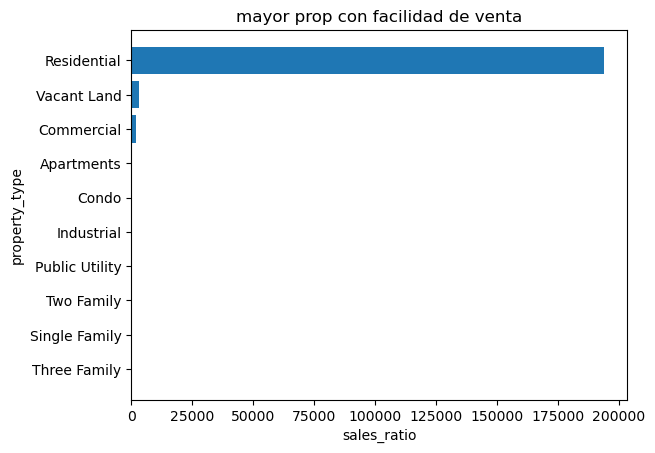

In [23]:
fig, ax= plt.subplots()

eje_x=g2.index.tolist()
data=g2["sales_ratio"].tolist()

ax.barh(eje_x, data)
ax.set_xlabel("sales_ratio")
ax.set_ylabel("property_type")
ax.set_title("mayor prop con facilidad de venta")

plt.show()

<h1>Respuesta 2</h1>

<p>Tal a como se puede observar en la tabla y en el grafico, la propiedad tipo Residential tiene mayor indice de ventas, sindo esto ratificado con los datos analizados en la pregunta 1.</p>

<h2 Style='color: #0841B9'> 3. ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de propiedades? Y ¿Qué elementos particulares tienen esas ciudades o pueblos?</h2>

In [24]:
g3= df_rss.groupby(["Town"]).count()
g3= g3.iloc[:8]
g3=g3.sort_values("sales_ratio", ascending= False)
g3['sales_ratio']

Town
Avon            1749
Berlin          1113
Ansonia          938
Bethany          533
Beacon Falls     416
Ashford          311
Barkhamsted      277
Andover          189
Name: sales_ratio, dtype: int64

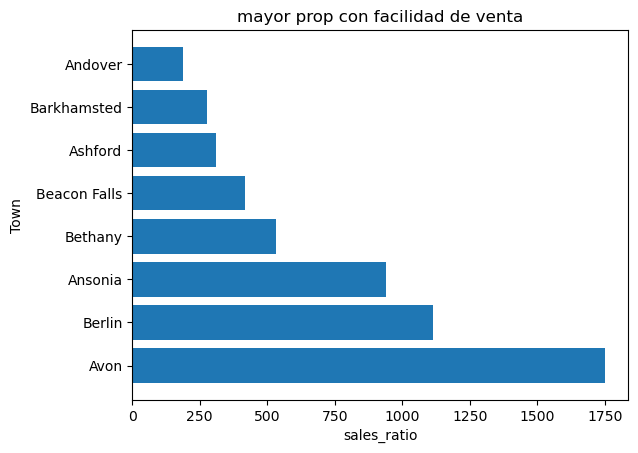

In [25]:
fig, ax= plt.subplots()

eje_x=g3.index.tolist()
data=g3["sales_ratio"].tolist()

ax.barh(eje_x, data)
ax.set_xlabel("sales_ratio")
ax.set_ylabel("Town")
ax.set_title("mayor prop con facilidad de venta")

plt.show()

<h1>Respuesta 3</h1>

<p>El mayor indice de ventas de propiedades se encuentra en la ciudad de Avon, ubicada en Colorado, USA, siendo este un pueblo un lugar con vistas escenicas muy cauivantes y un indice poblacional muy bajo, lo que permite un desarrollo mas lento y un ambiente mas tranquilo dentro de esta zona.</p>

<h2 Style='color: #0841B9'> 4. ¿Cuál es el costo promedio de las propiedades residenciales y comerciales?</h2>

In [26]:
type = df_rss.groupby(['property_type'])['sale_amount'].mean()
Residential = type['Residential']
Commercial = type ['Commercial']

 #Respuesta 4

print("promedio residential:",Residential)
print("promedio commercial:",Commercial)

promedio residential: 346268.1652413106
promedio commercial: 1771751.5797180934


<h1>Respuesta 4</h1>

<p>El costo promedio de Residential es 346,268.17 y el de Commercial es 1,771,751.58, lo que implica que el numero de propiedades comerciales tienen mas rentabilidad en el mercado</p>

<h2 Style='color: #0841B9'> 5. ¿Cuál es tipo de propiedades residenciales que se vende con mayor frecuencia, donde y con que costo promedio?</h2>

In [27]:
df_rss.groupby(['residential_type', 'Town'])['sale_amount'].sum() #respuesta 5

residential_type  Town         
Condo             Ansonia          ₡1,877,800.00
                  Ashford             ₡79,900.00
                  Avon            ₡47,116,190.00
                  Beacon Falls    ₡17,585,761.00
                  Berlin          ₡17,568,491.00
                                       ...      
Two Family        Windsor Locks    ₡3,144,500.00
                  Wolcott            ₡976,800.00
                  Woodbridge       ₡1,717,500.00
                  Woodbury           ₡165,000.00
                  Woodstock          ₡205,000.00
Name: sale_amount, Length: 520, dtype: float64

<h1>Respuesta 5</h1>

<p>Con base en la informacion anterior, se puede inferir que el tipo de residencia que genera mas ventas con mayor frecuencia es el condominio, en pueblos como Ansonia, Ashford, Avon, Beacon Falls y Berlin, permitiendo percibir gran cantidad del efectivo generado por la venta de estas propiedades.</p>

<h2 Style='color: #0841B9'> 6. ¿Cuál es margen promedio de ganancia por cada una de las propiedades vendidas?</h2>

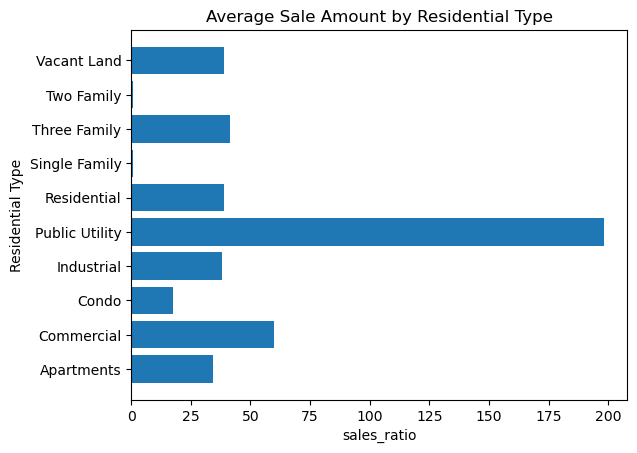

property_type
Apartments        ₡34.21
Commercial        ₡60.08
Condo             ₡17.34
Industrial        ₡37.91
Public Utility   ₡198.04
Residential       ₡38.86
Single Family      ₡0.72
Three Family      ₡41.35
Two Family         ₡0.60
Vacant Land       ₡38.80
Name: sales_ratio, dtype: float64

In [28]:
grouped_data = df_rss.groupby('property_type')['sales_ratio'].sum()
data = df_rss.groupby(['property_type'])['sales_ratio'].mean()

fig, ax = plt.subplots()

eje_x = data.index.tolist()

ax.barh(eje_x, data)

ax.set_xlabel("sales_ratio")
ax.set_ylabel("Residential Type")
ax.set_title("Average Sale Amount by Residential Type")

plt.show()

df_rss.groupby(["property_type"])['sales_ratio'].mean() #respuesta 6

<h1>Respuesta 6</h1>

<p>Por ultimo, podemos encontrar que existe una disfribucion bastante distribuida por partes similares a lo largo del complejo de datos, sin embargo en el que podemos encontrar mayor cantidad de ganancia es en Public Utilities, sin embargo, el apartado de commercial no se queda atras con un 60.08%.</p>

<h1>Fin del Proyecto</h1>
